In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\guilh\AppData\Local\Temp\ipykernel_14704\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
PM10_violacoes= pd.read_csv('./04-dados-qualar-longo-AML/PM10_violacoes.csv')
medicoes_AQI= pd.read_csv('./04-dados-qualar-longo-AML/indice_qualidade_ar_diario.csv', thousands=',', index_col=0, parse_dates=True)

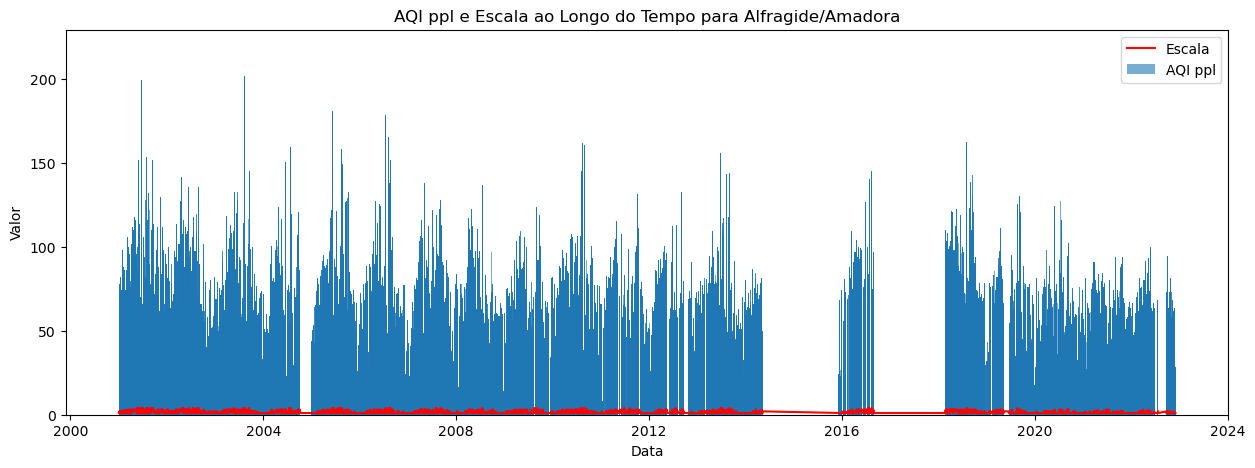

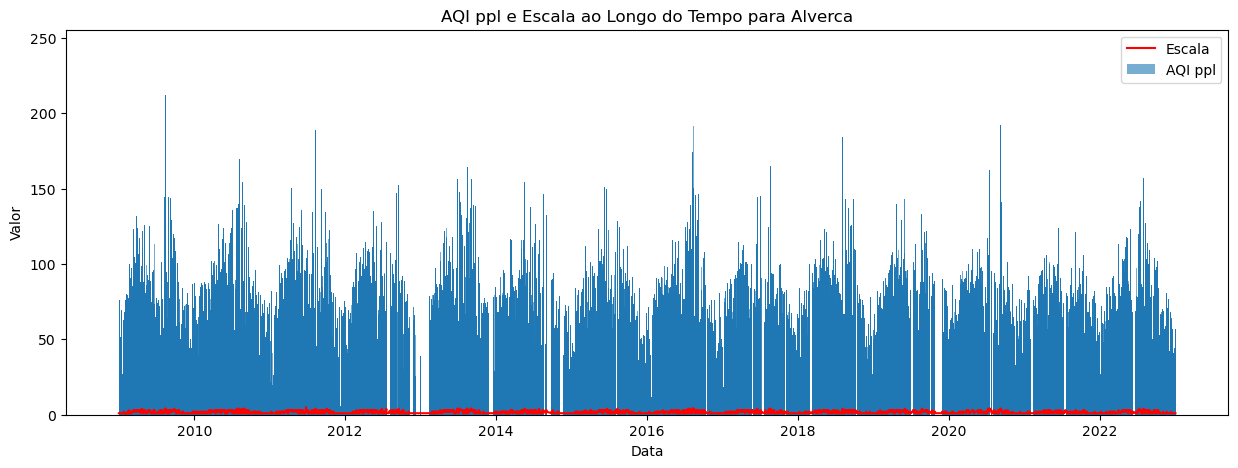

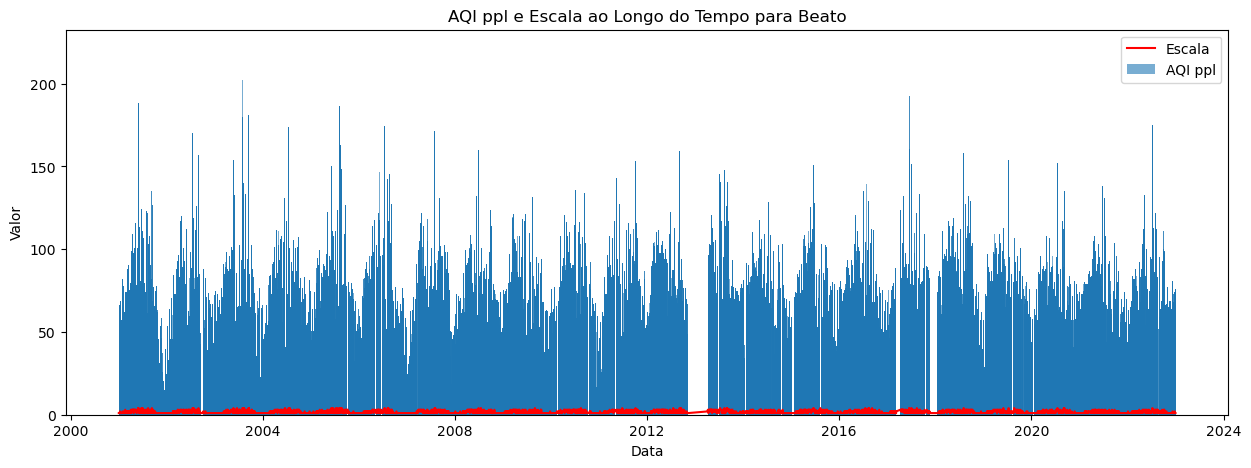

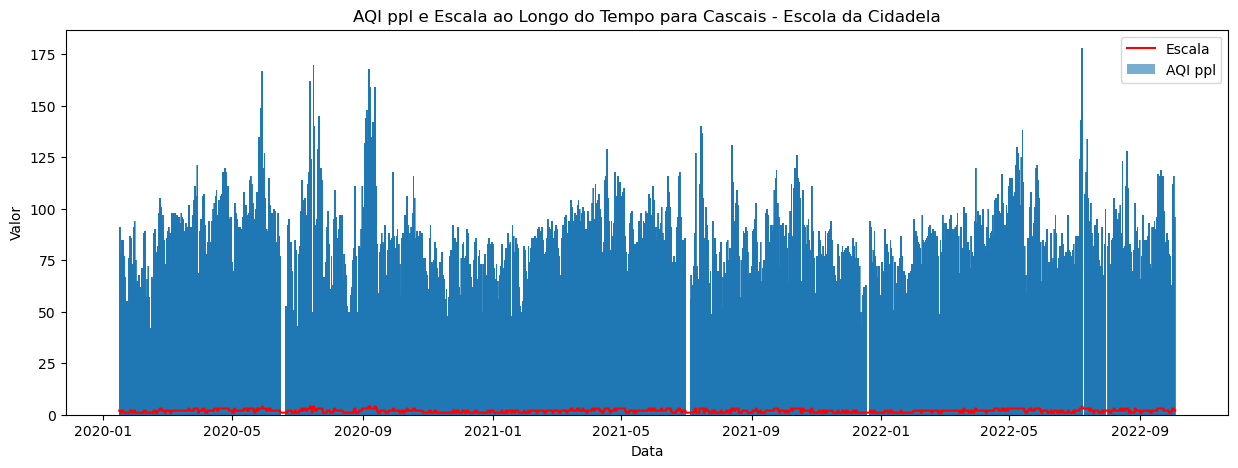

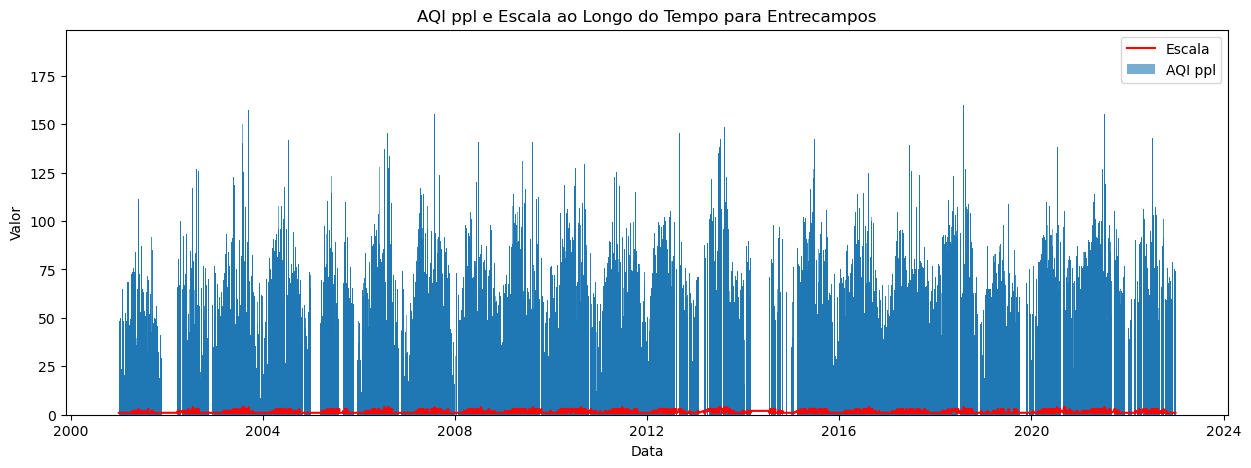

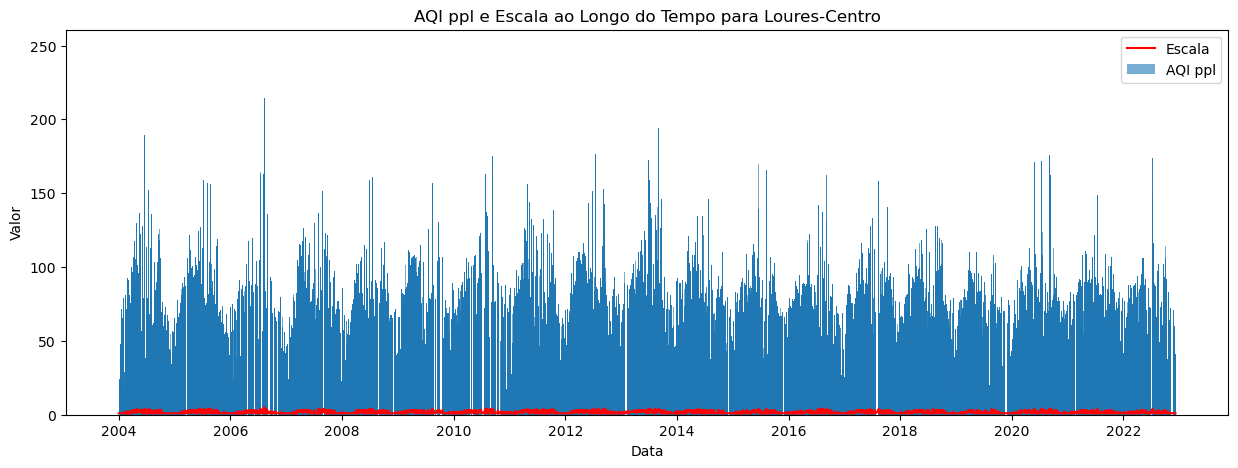

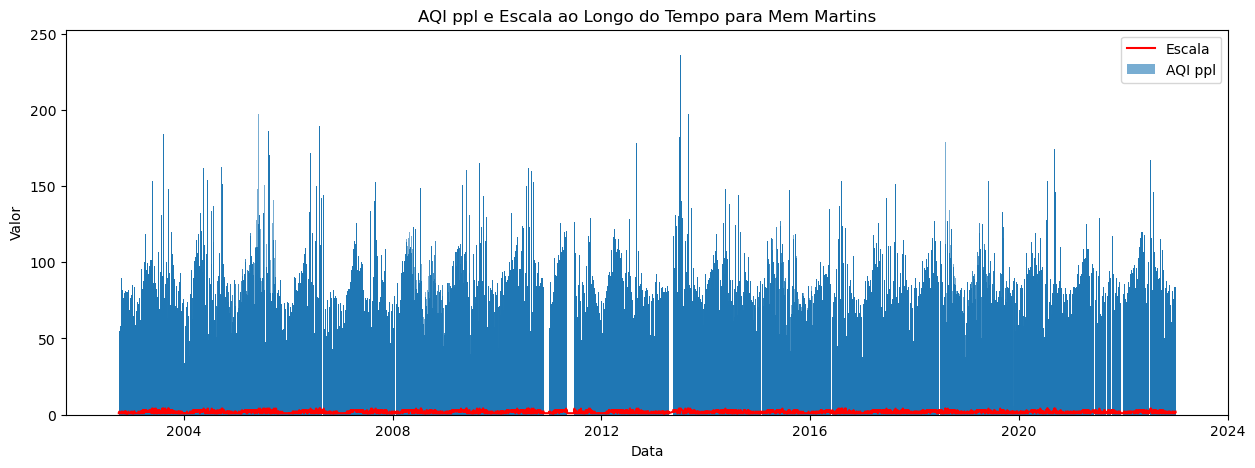

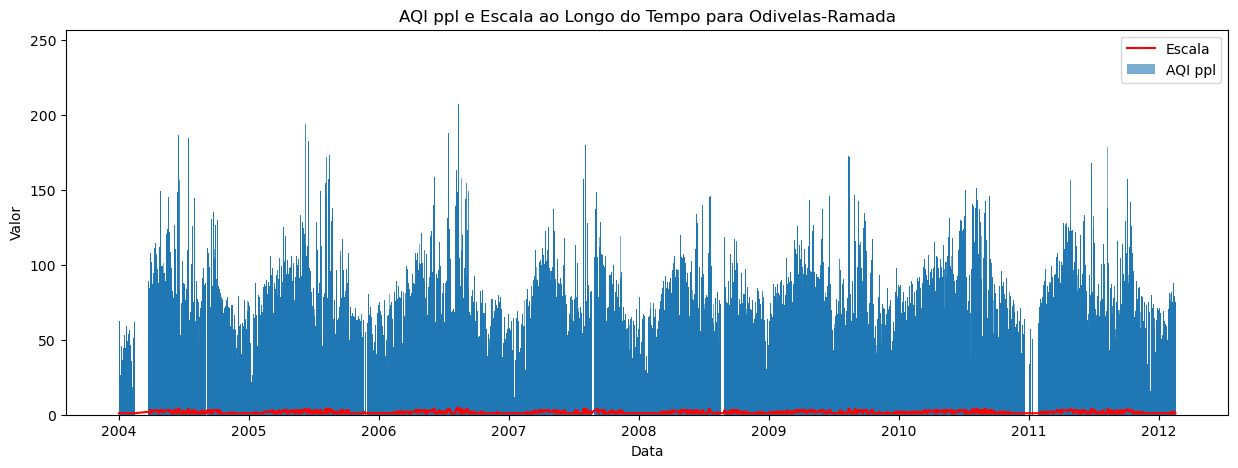

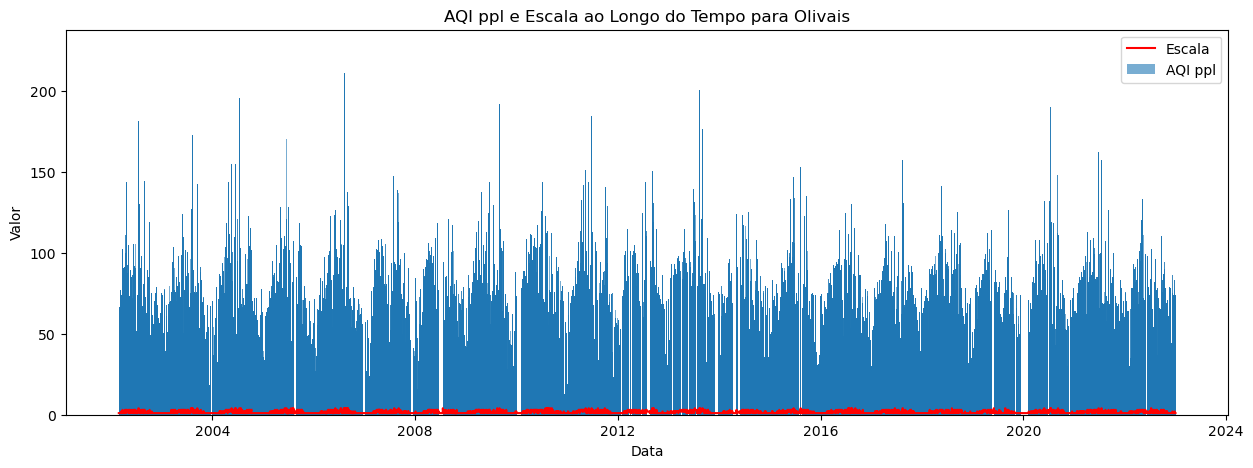

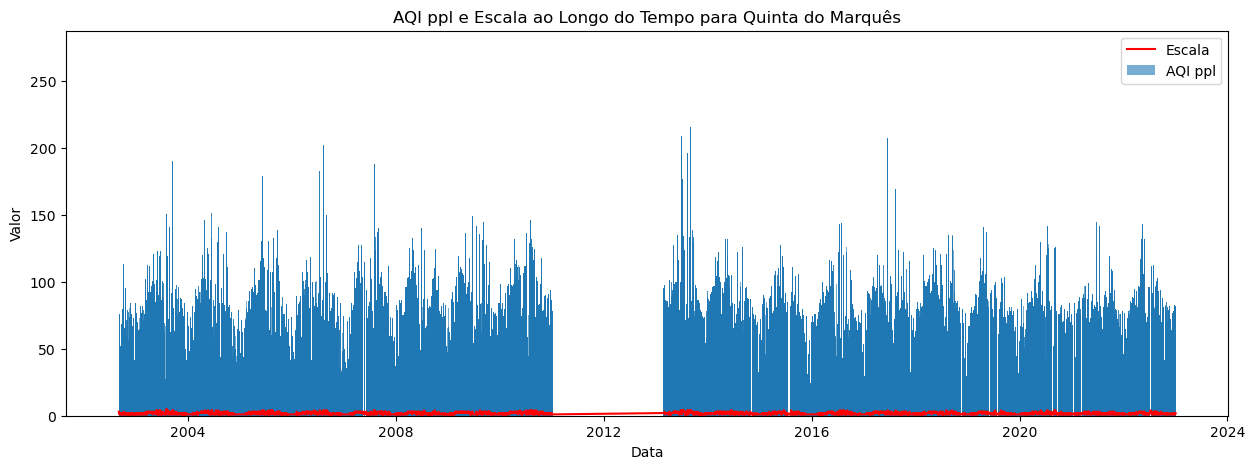

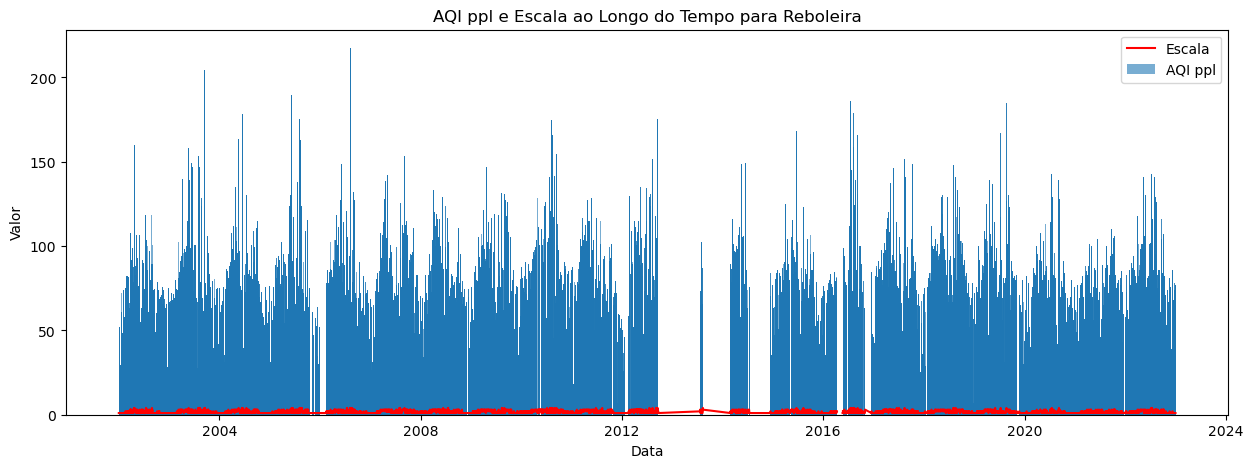

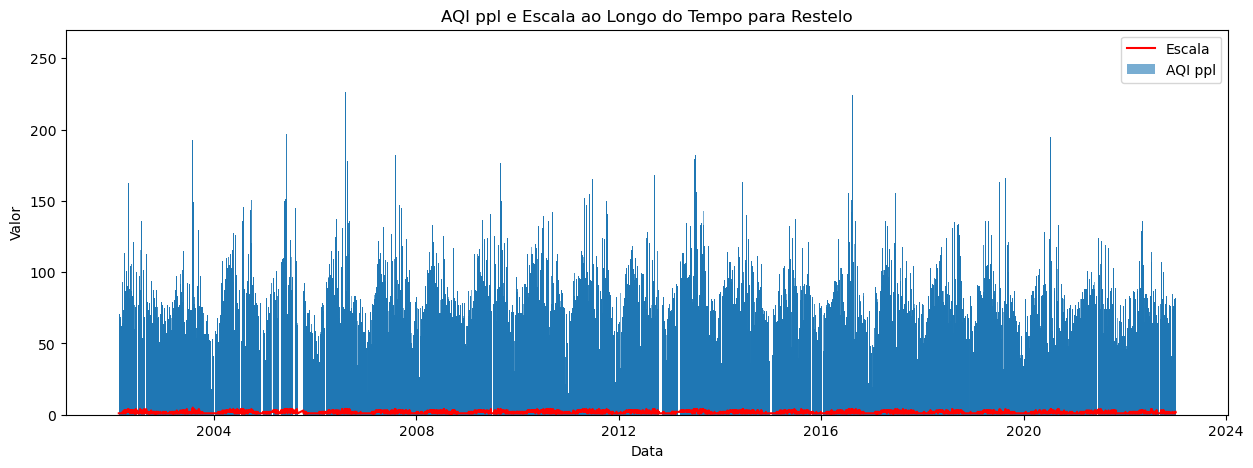

\\?\C:\Users\guilh\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


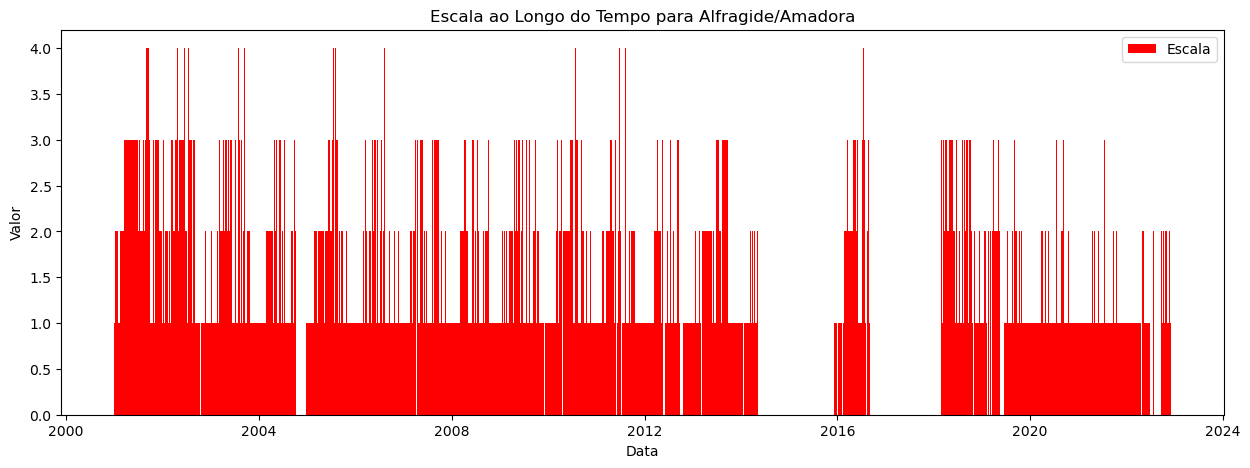

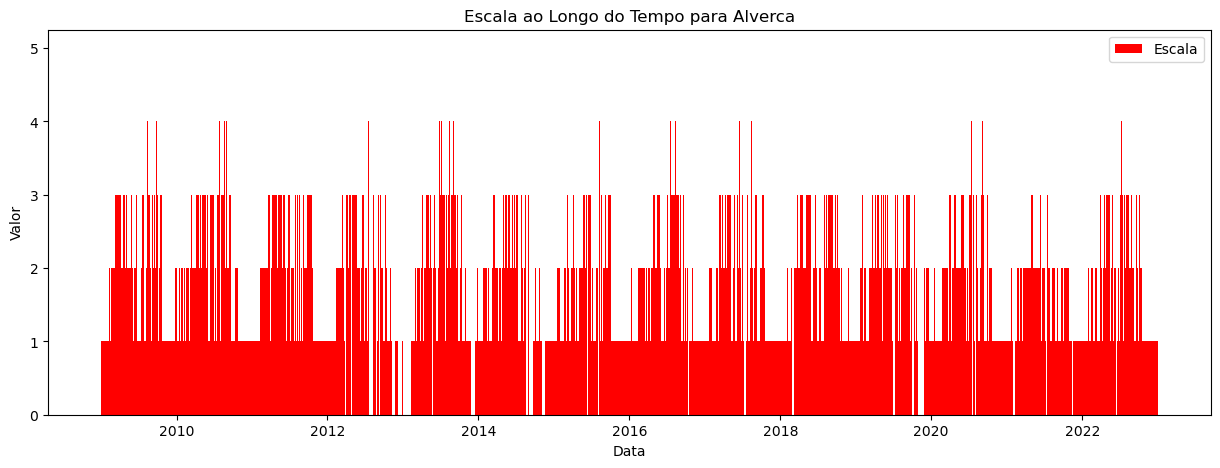

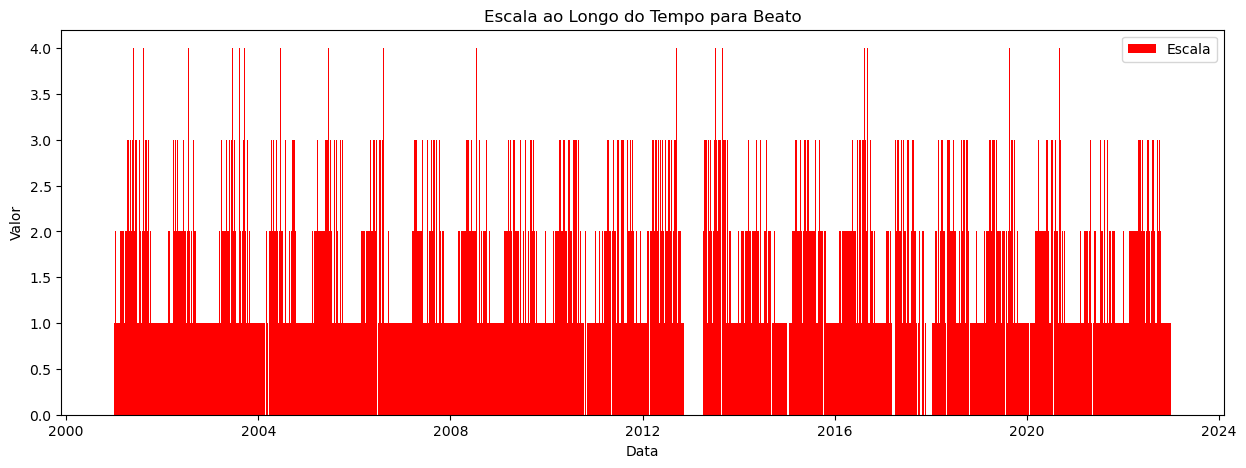

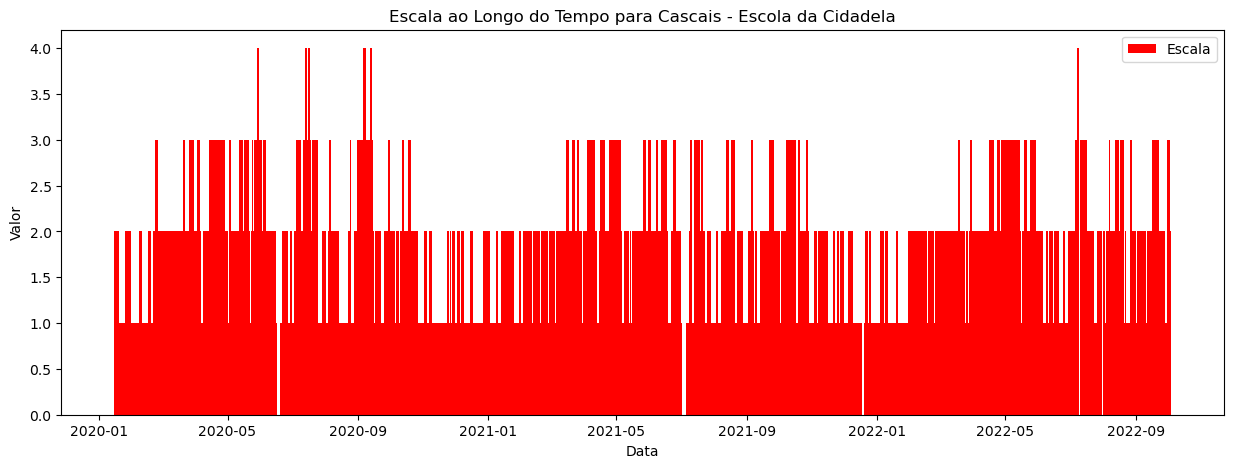

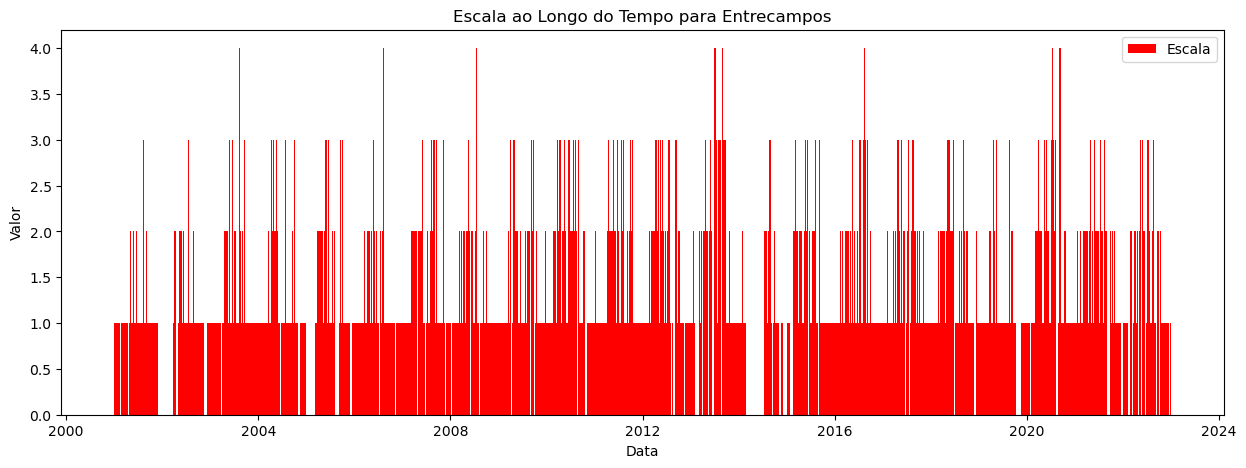

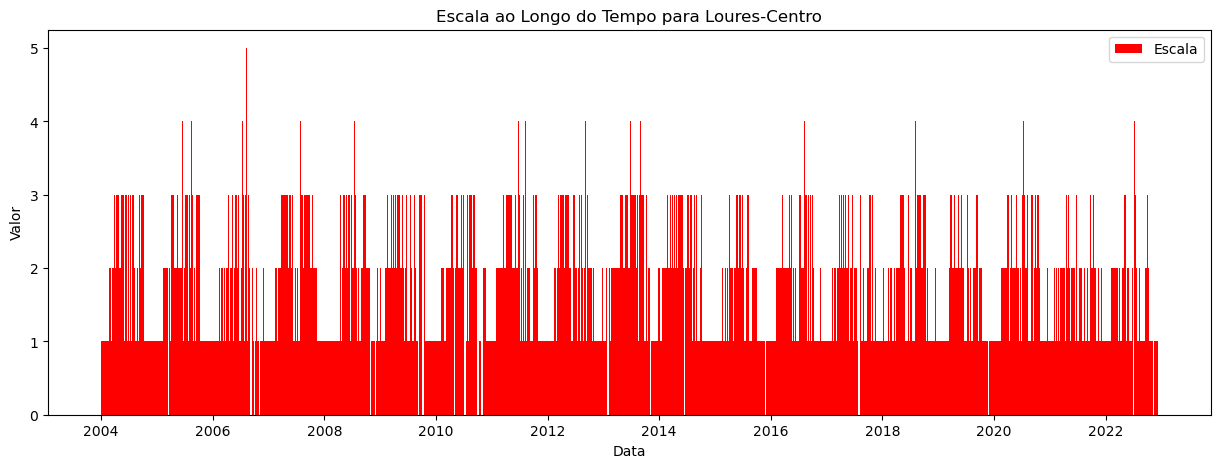

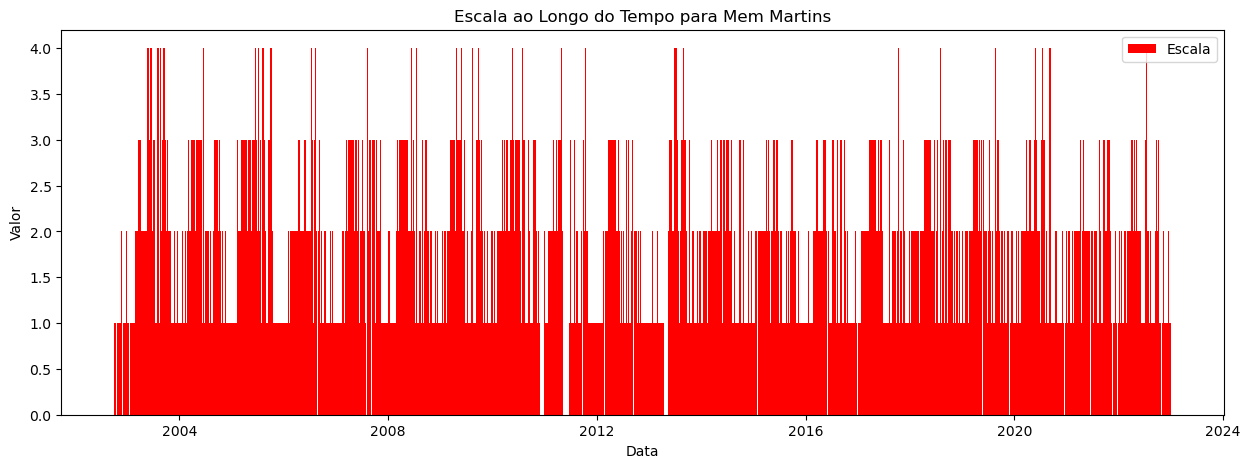

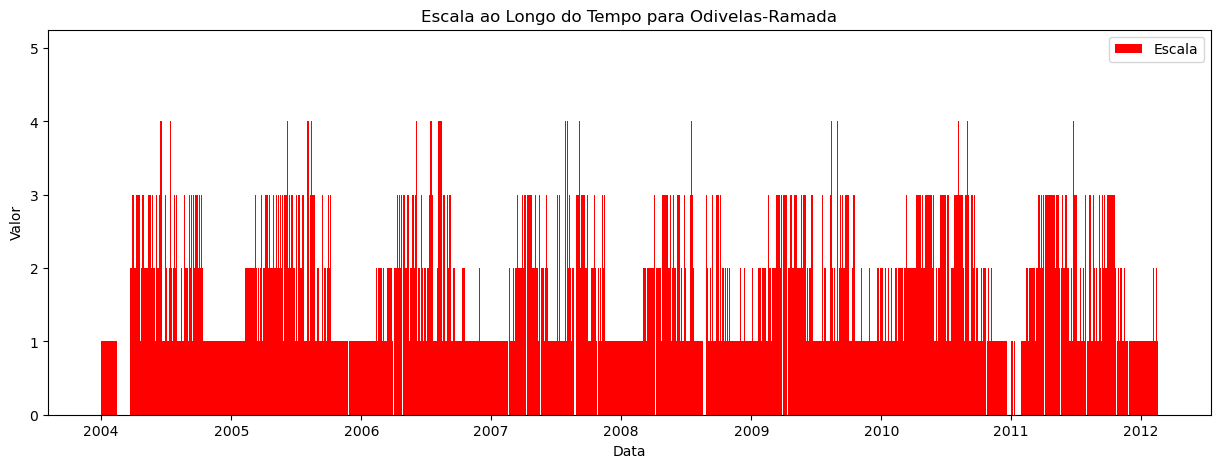

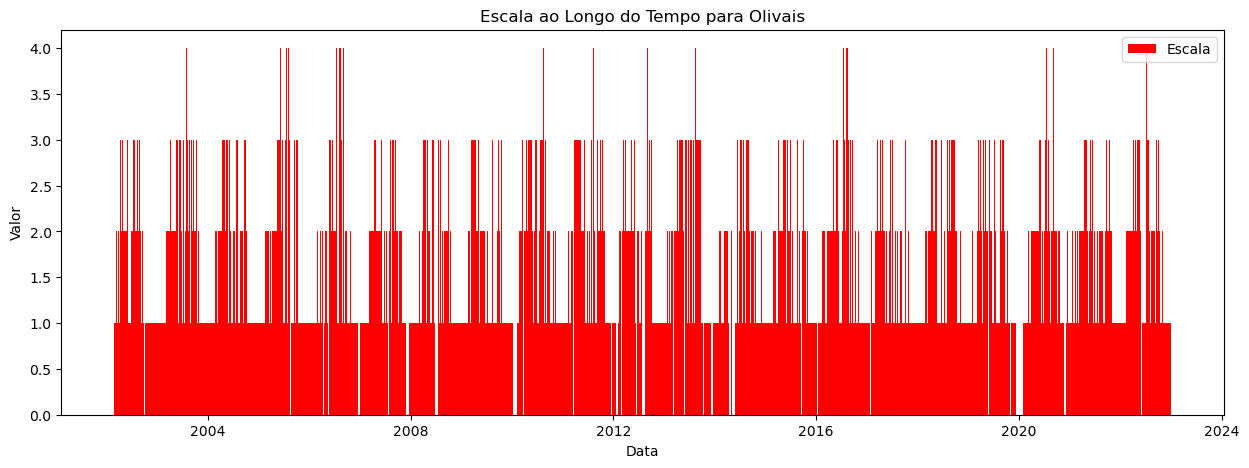

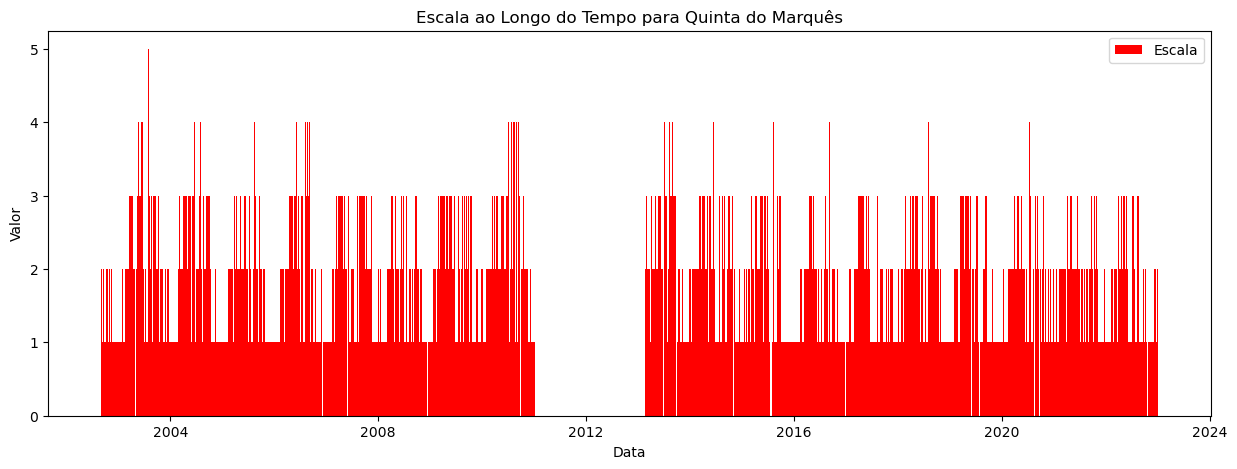

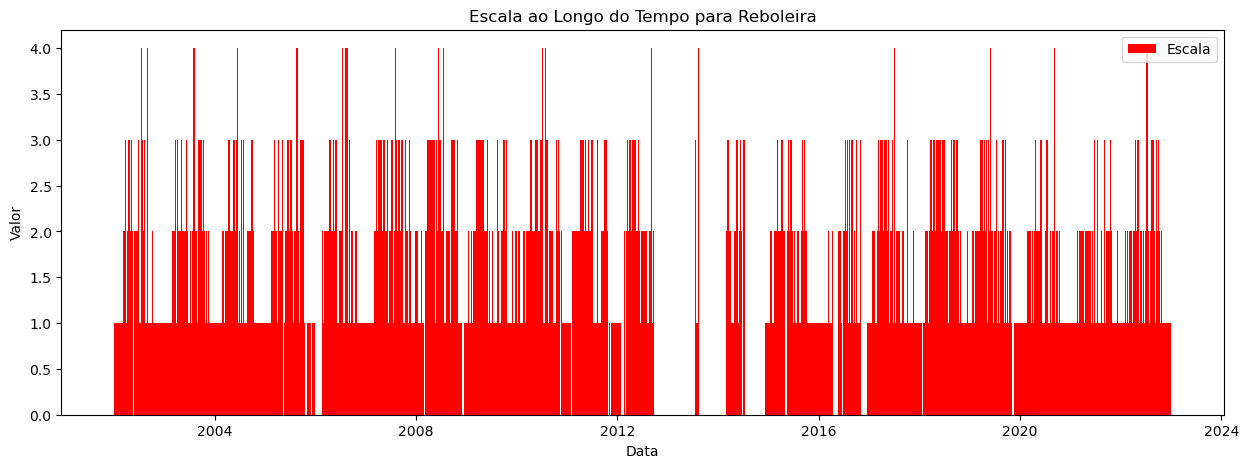

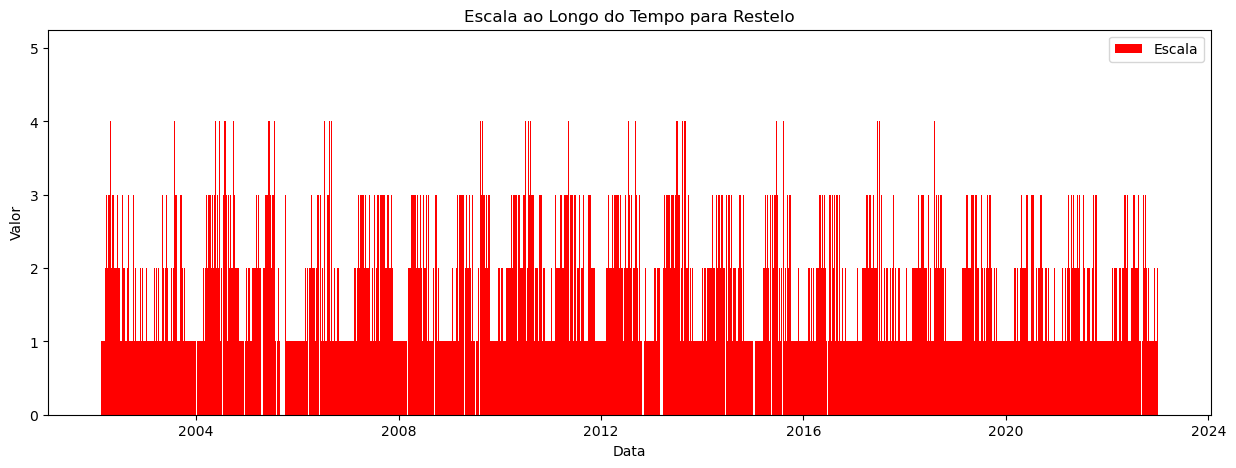

In [3]:
#AQI de um poluente para as estações de uma região (eventualmente separadas por tipo de estação)
estacoes=['Alfragide/Amadora','Alverca','Beato','Cascais - Escola da Cidadela','Entrecampos','Loures-Centro','Mem Martins','Odivelas-Ramada','Olivais','Quinta do Marquês','Reboleira','Restelo'] #conjunto das estações AML Norte
for estacao in estacoes:
    medicoes_O3 = medicoes_AQI[(medicoes_AQI['Poluente'] == 'O3') & (medicoes_AQI['Station'] == estacao)] #filtragem do dataframe
    medicoes_O3 = medicoes_O3.sort_index() #organizar as datas
    plt.figure(figsize=(15,5)) #tamanho do grafico
    plt.plot(medicoes_O3.index, medicoes_O3['escala'], label='Escala', color='red') #plot da escala
    plt.bar(medicoes_O3.index, medicoes_O3['AQI ppl'], label='AQI ppl', alpha=0.6) #plot AQI por puloente
    plt.xlabel('Data') 
    plt.ylabel('Valor')
    plt.title(f'AQI ppl e Escala ao Longo do Tempo para {estacao}')
    plt.legend()
    plt.show()

#Por dia, apenas a classificação do AQI
for estacao in estacoes:
    medicoes_O3 = medicoes_AQI[(medicoes_AQI['Poluente'] == 'O3') & (medicoes_AQI['Station'] == estacao)]
    medicoes_O3 = medicoes_O3.sort_index()
    plt.figure(figsize=(15,5))
    plt.bar(medicoes_O3.index, medicoes_O3['escala'], label='Escala', color='red')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.title(f'Escala ao Longo do Tempo para {estacao}')
    plt.legend()
    plt.show()


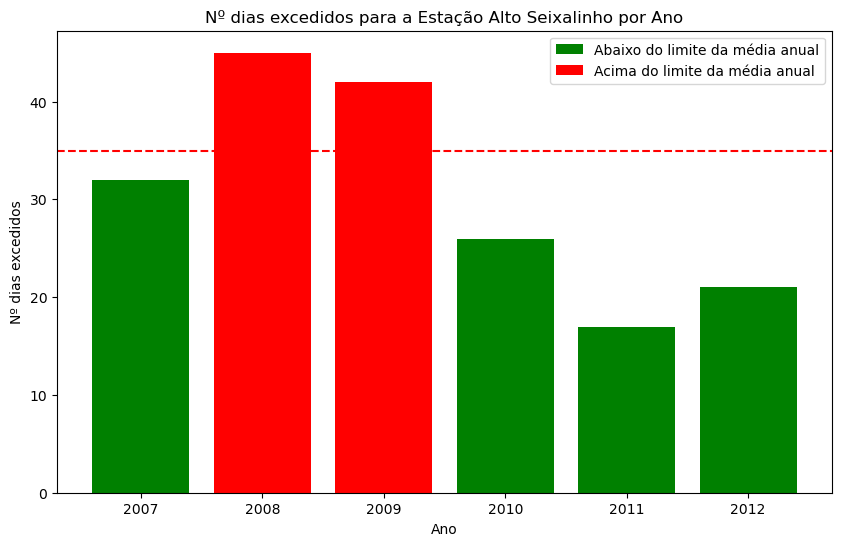

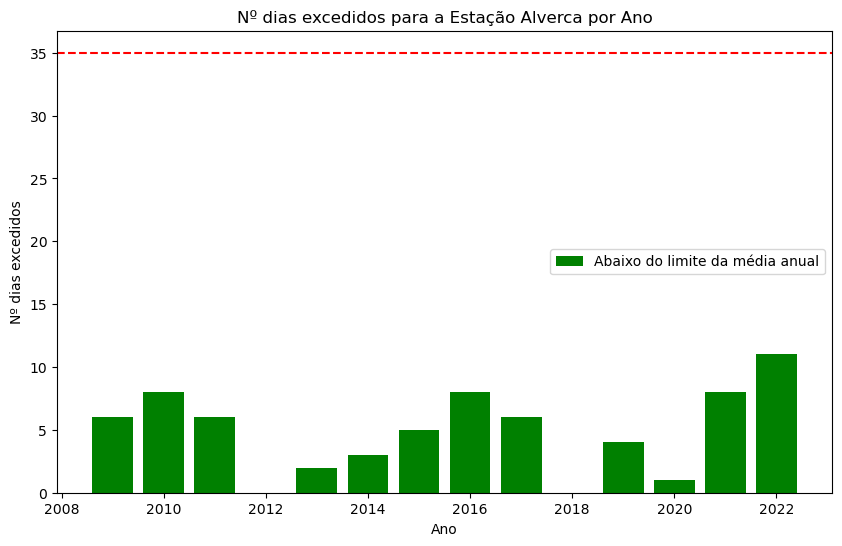

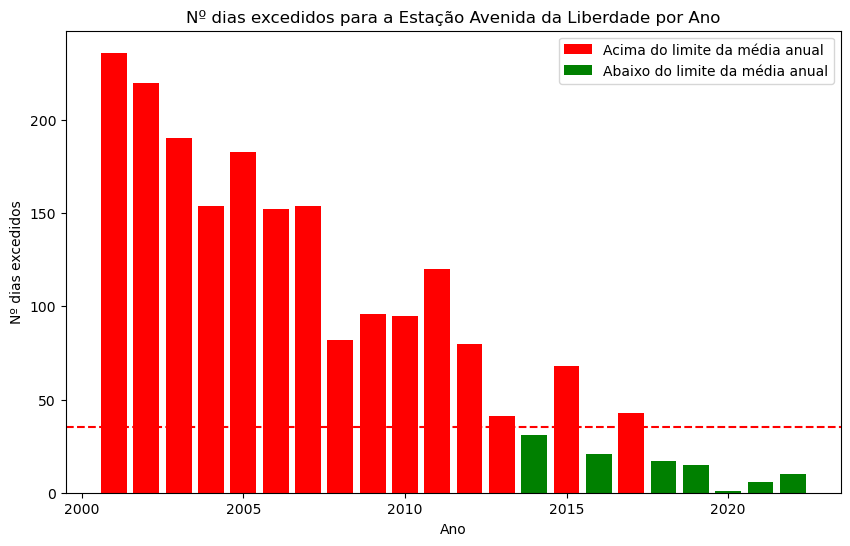

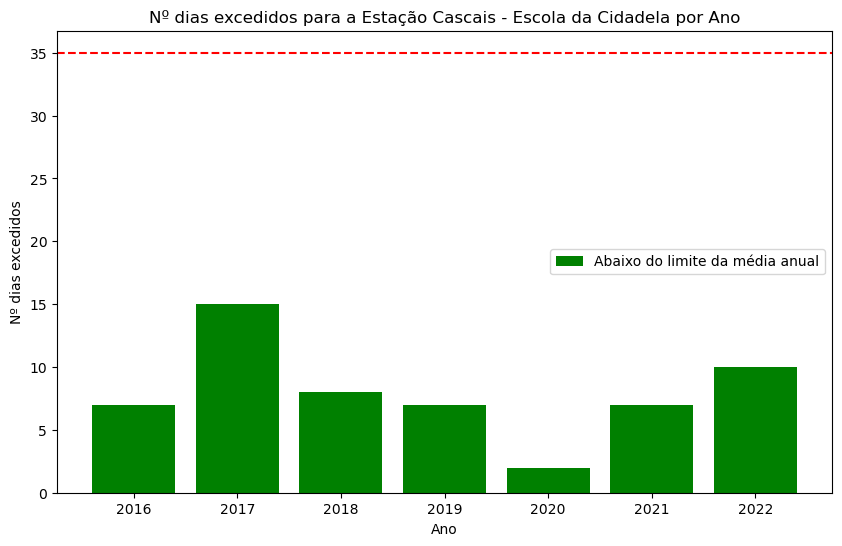

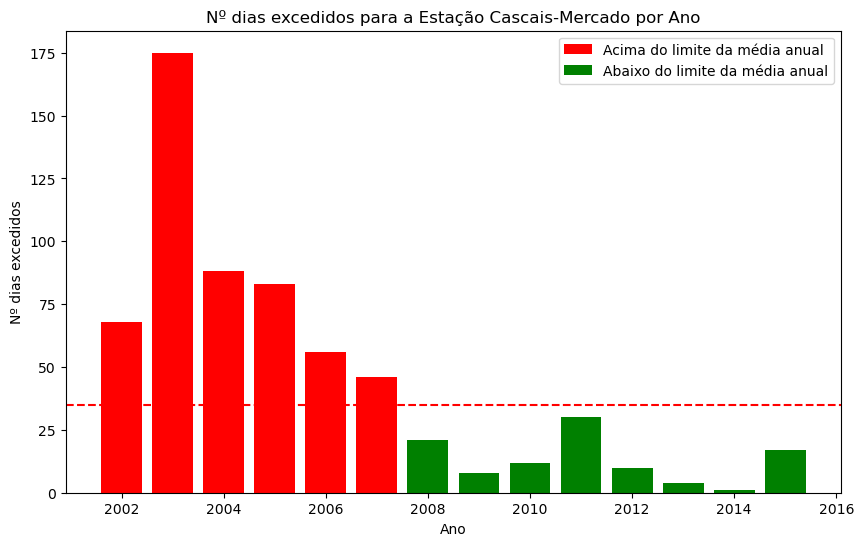

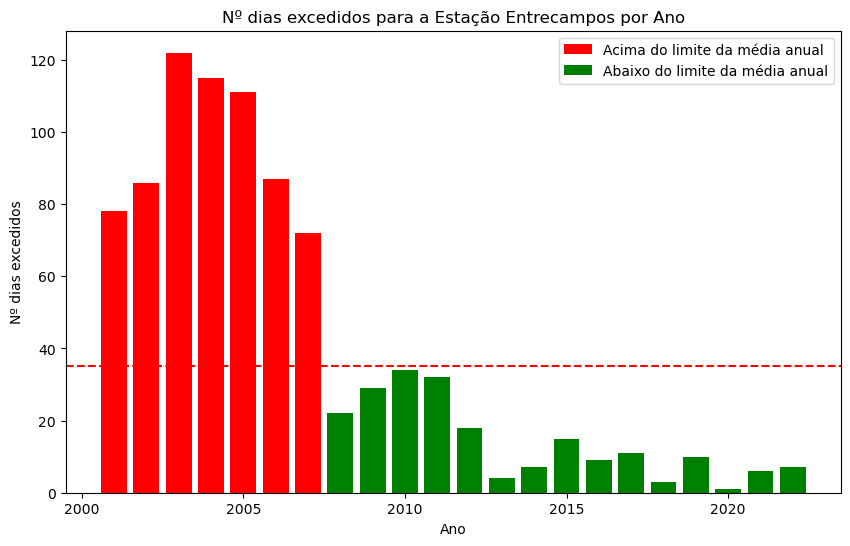

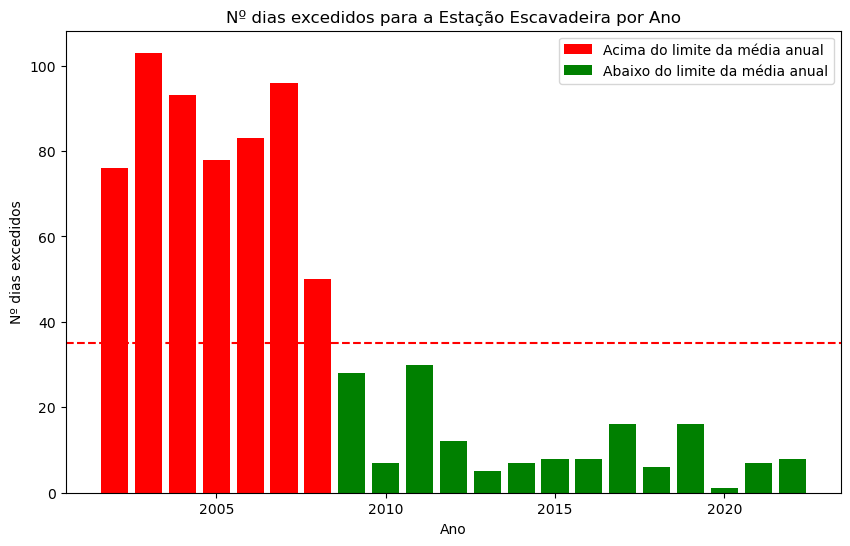

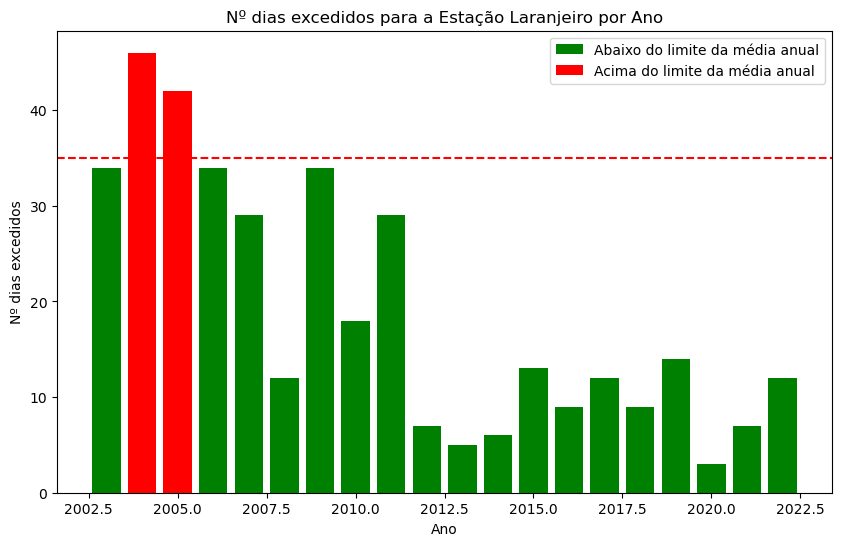

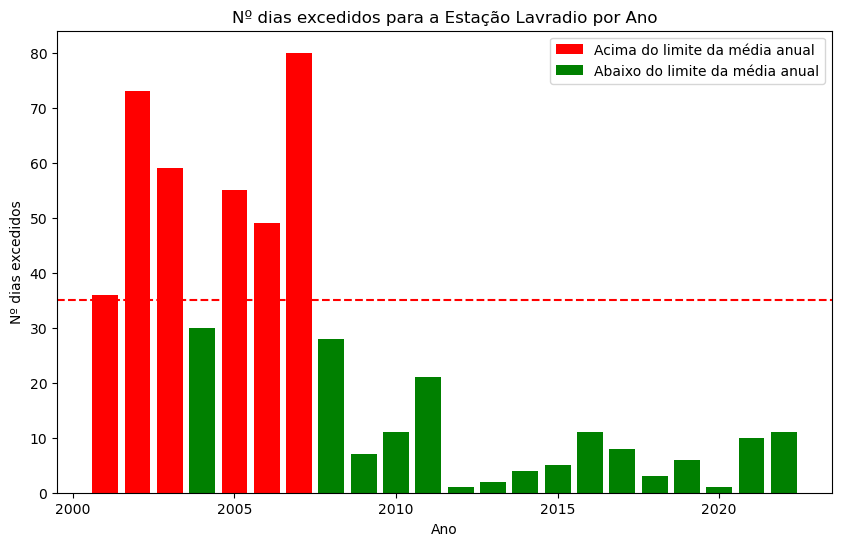

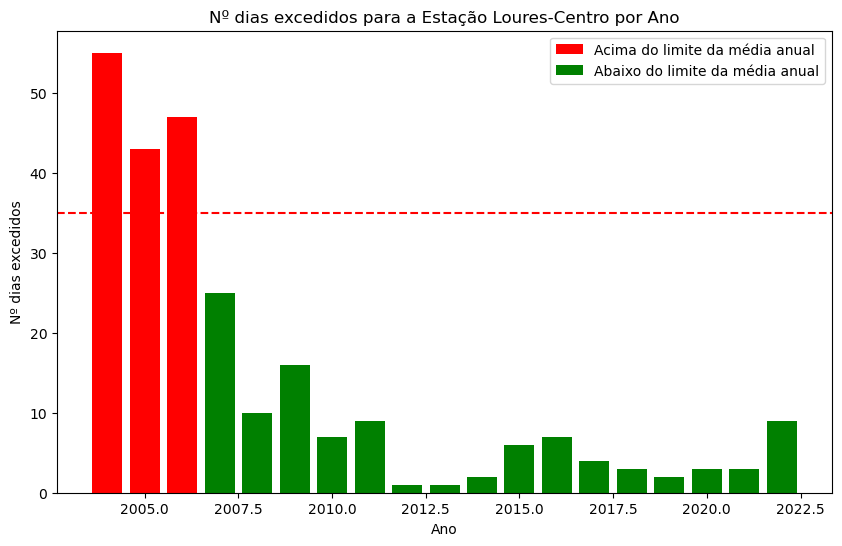

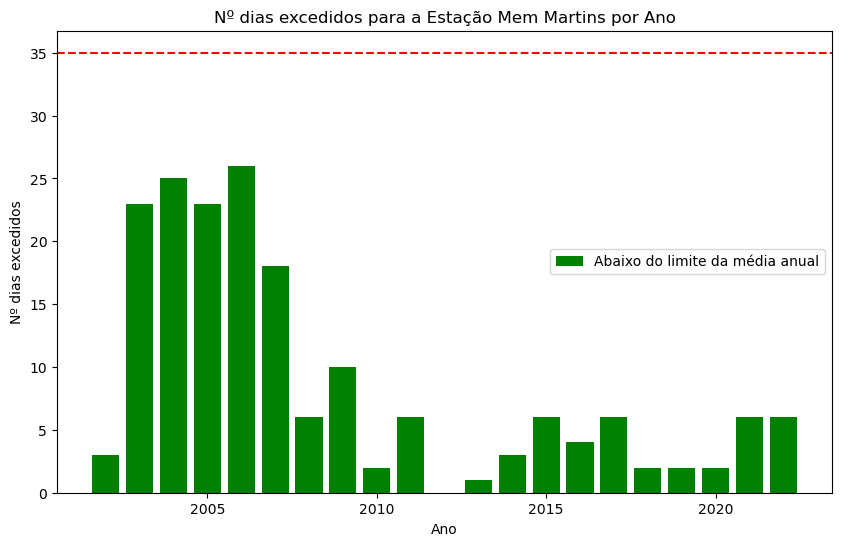

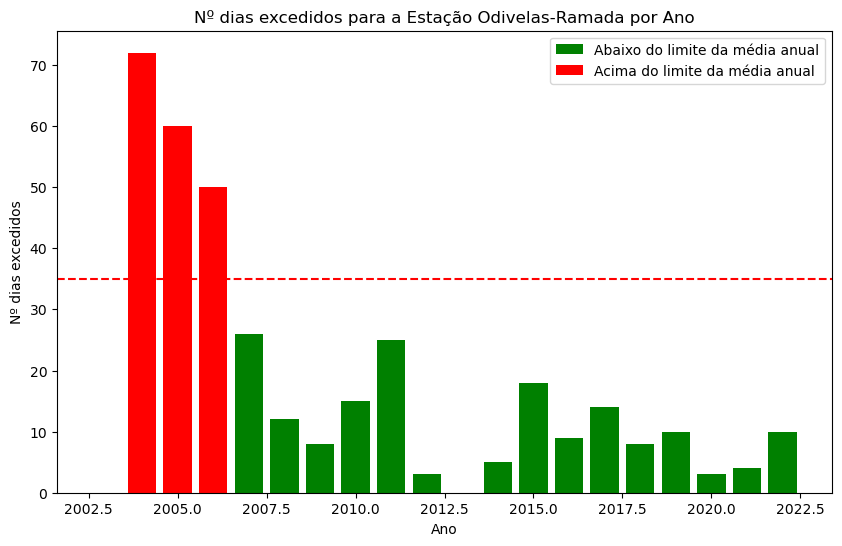

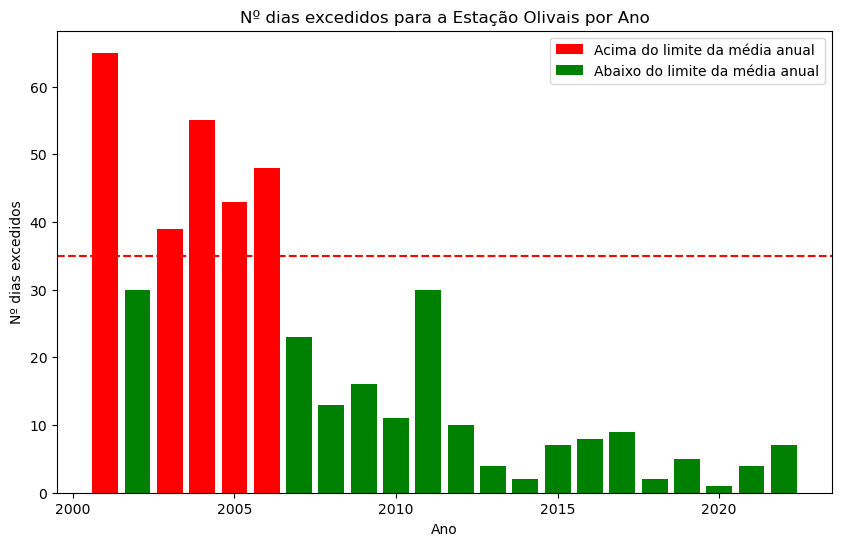

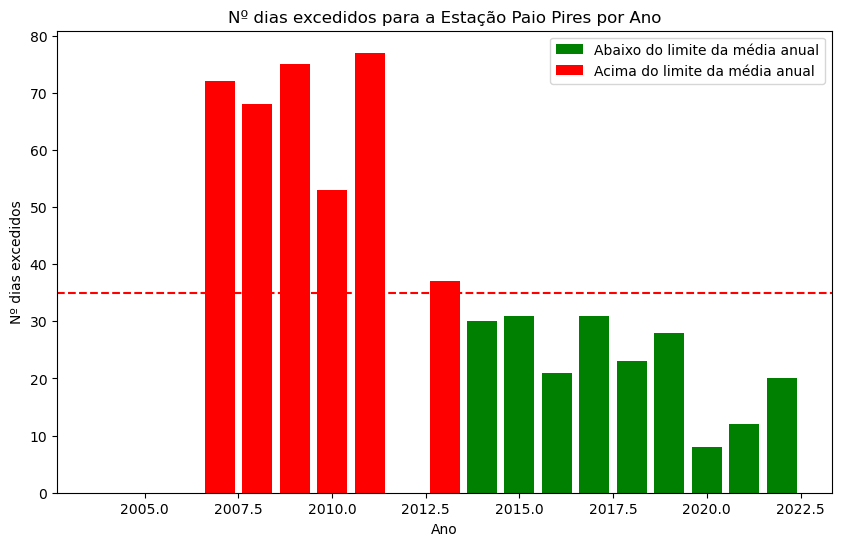

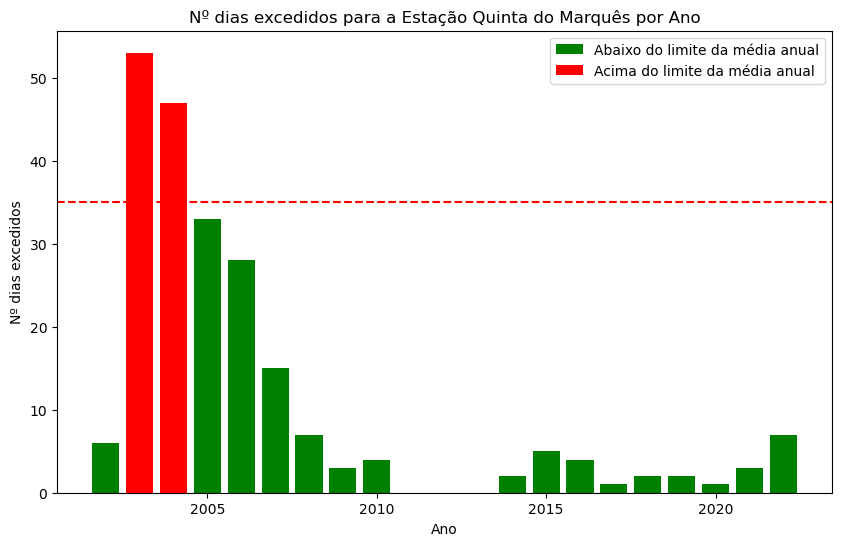

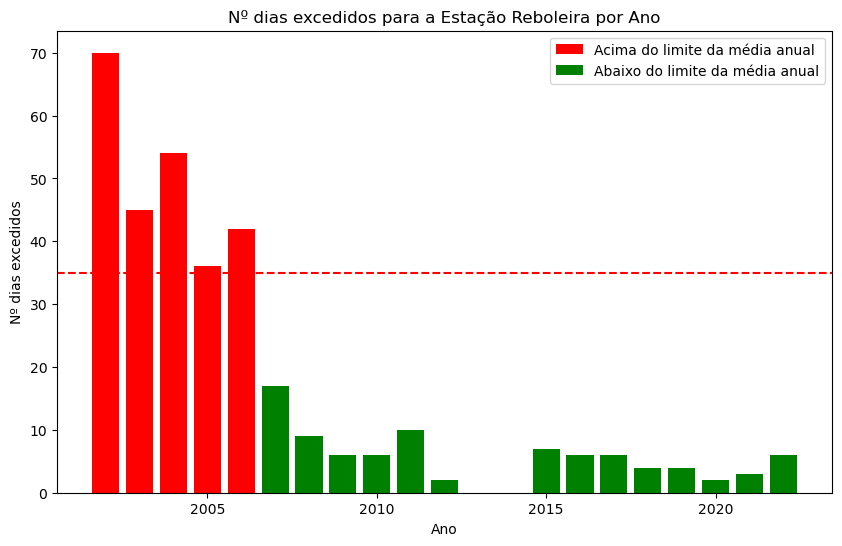

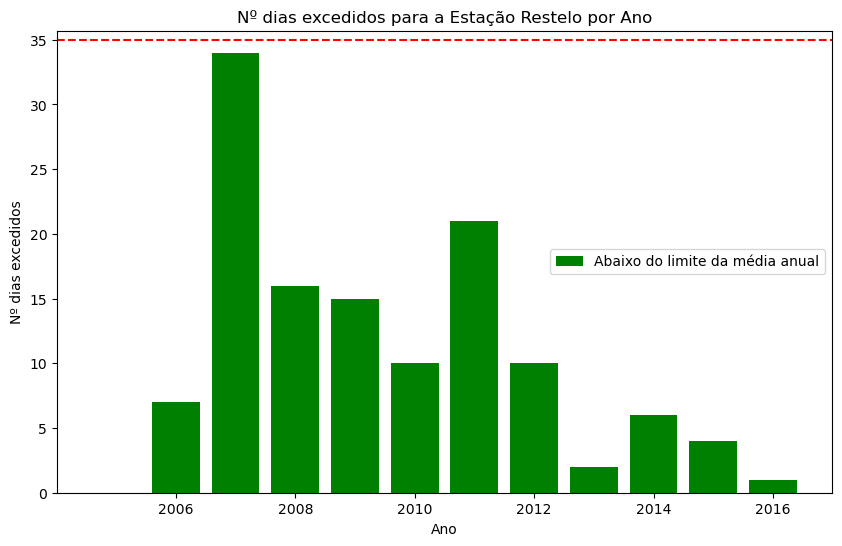

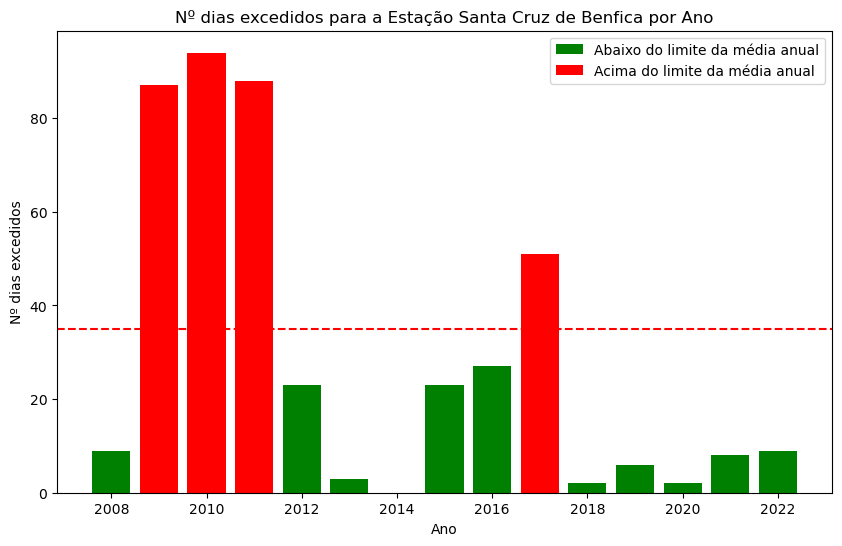

In [4]:
#Evolução do Número de vioçaões anuais para um poluente para varias estações
estacoes = PM10_violacoes['Station'].unique() 

for estacao in estacoes:
    anos = PM10_violacoes[PM10_violacoes['Station']== estacao]['Ano'].unique()  #lista de anos para cada estação
    plt.figure(figsize=(10,6)) 
    legendas = set() #lista de legendas sem ter repetidos
    for ano in anos:
        data = PM10_violacoes[(PM10_violacoes['Station'] == estacao) & (PM10_violacoes['Ano'] == ano)]['Num_dias_excedidos'] #serie com os valores de cada ano
        total = data.sum() #transformar a serie num so valor
        core = 'g' if total <= 35 else 'r' #definir a cor do grafico
        legenda = 'Abaixo do limite da média anual' if core == 'g' else 'Acima do limite da média anual' #definiçã
        if legenda not in legendas: #fazer com que as legendas nao se repitam para cada grafico
            plt.bar(ano, total, color=core, label=legenda)
            legendas.add(legenda)
        else:
            plt.bar(ano, total, color=core)
    plt.axhline(y=35, color='r', linestyle='--') #linha ao nivel do y=35
    plt.xlabel('Ano')
    plt.ylabel('Nº dias excedidos')
    plt.title(f'Nº dias excedidos para a Estação {estacao} por Ano')
    plt.legend()
    plt.show()